In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 5 | zhigansk
Processing Record 2 of Set 5 | bajil
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | ushuaia
Processing Record 6 of Set 5 | scottsburgh
City not found. Skipping...
Processing Record 7 of Set 5 | kollumerland
City not found. Skipping...
Processing Record 8 of Set 5 | mar del plata
Processing Record 9 of Set 5 | butaritari
Processing Record 10 of Set 5 | jamestown
Processing Record 11 of Set 5 | cape town
Processing Record 12 of Set 5 | grand centre
City not found. Skipping...
Processing Record 13 of Set 5 | sharjah
Processing Record 14 of Set 5 | ilulissat
Processing Record 15 of Set 5 | khatanga
Processing Record 16 of Set 5 | mackay
Processing Record 17 of Set 5 | ghanzi
Processing Record 18 of Set 5 | qaanaaq
Processing Record 19 of Set 5 | mataura
Processing Record 20 of Set 5 | otavi
Processing Record 21 of Set 5 | albany
Processing Record 22 of Set 5 | atbasar
Processing Re

Processing Record 34 of Set 8 | mitsamiouli
Processing Record 35 of Set 8 | gravdal
Processing Record 36 of Set 8 | nanortalik
Processing Record 37 of Set 8 | cidreira
Processing Record 38 of Set 8 | ha giang
Processing Record 39 of Set 8 | svetlaya
Processing Record 40 of Set 8 | ilo
Processing Record 41 of Set 8 | laredo
Processing Record 42 of Set 8 | faanui
Processing Record 43 of Set 8 | la asuncion
Processing Record 44 of Set 8 | luderitz
Processing Record 45 of Set 8 | asfi
Processing Record 46 of Set 8 | ngorongoro
Processing Record 47 of Set 8 | san patricio
Processing Record 48 of Set 8 | pajapan
Processing Record 49 of Set 8 | inuvik
Processing Record 50 of Set 8 | brae
Processing Record 1 of Set 9 | kuusamo
Processing Record 2 of Set 9 | cabo san lucas
Processing Record 3 of Set 9 | darhan
Processing Record 4 of Set 9 | kiruna
Processing Record 5 of Set 9 | dire
Processing Record 6 of Set 9 | mrirt
City not found. Skipping...
Processing Record 7 of Set 9 | ancud
Processing 

Processing Record 21 of Set 12 | xichang
Processing Record 22 of Set 12 | faridabad
Processing Record 23 of Set 12 | panama city
Processing Record 24 of Set 12 | butterworth
Processing Record 25 of Set 12 | chara
Processing Record 26 of Set 12 | boljarovo
City not found. Skipping...
Processing Record 27 of Set 12 | chumikan
Processing Record 28 of Set 12 | kashi
Processing Record 29 of Set 12 | murakami
Processing Record 30 of Set 12 | zhetybay
City not found. Skipping...
Processing Record 31 of Set 12 | santa cruz
Processing Record 32 of Set 12 | tselinnoye
Processing Record 33 of Set 12 | hervey bay
Processing Record 34 of Set 12 | norman wells
Processing Record 35 of Set 12 | cuauhtemoc
Processing Record 36 of Set 12 | kuantan
Processing Record 37 of Set 12 | bengkulu
Processing Record 38 of Set 12 | rockland
Processing Record 39 of Set 12 | viligili
City not found. Skipping...
Processing Record 40 of Set 12 | buala
Processing Record 41 of Set 12 | labuhan
Processing Record 42 of Se

Processing Record 2 of Set 16 | kirkenaer
Processing Record 3 of Set 16 | naron
Processing Record 4 of Set 16 | hay river
Processing Record 5 of Set 16 | bilibino
Processing Record 6 of Set 16 | sao felix do xingu
Processing Record 7 of Set 16 | evensk
Processing Record 8 of Set 16 | honningsvag
Processing Record 9 of Set 16 | terrak
Processing Record 10 of Set 16 | lyambir
Processing Record 11 of Set 16 | lucea
Processing Record 12 of Set 16 | state college
Processing Record 13 of Set 16 | goycay
City not found. Skipping...
Processing Record 14 of Set 16 | warqla
City not found. Skipping...
Processing Record 15 of Set 16 | damghan
Processing Record 16 of Set 16 | huai yot
Processing Record 17 of Set 16 | doha
Processing Record 18 of Set 16 | watsa
Processing Record 19 of Set 16 | salym
Processing Record 20 of Set 16 | sayyan
Processing Record 21 of Set 16 | tirumakudal narsipur
Processing Record 22 of Set 16 | caxito
Processing Record 23 of Set 16 | salalah
Processing Record 24 of Set

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhigansk,66.7697,123.3711,-27.02,98,99,4.99,RU,2022-02-05 03:11:42
1,Bajil,15.0584,43.2851,74.14,82,75,3.24,YE,2022-02-05 03:11:43
2,Port Elizabeth,-33.9180,25.5701,67.10,79,94,7.83,ZA,2022-02-05 03:11:43
3,Coquimbo,-29.9533,-71.3436,64.13,82,0,2.30,CL,2022-02-05 03:11:44
4,Ushuaia,-54.8000,-68.3000,46.06,81,0,11.50,AR,2022-02-05 03:11:26
5,Mar Del Plata,-38.0023,-57.5575,68.09,85,100,5.01,AR,2022-02-05 03:11:45
6,Butaritari,3.0707,172.7902,82.63,77,36,17.76,KI,2022-02-05 03:11:45
7,Jamestown,42.0970,-79.2353,20.52,51,100,4.61,US,2022-02-05 03:11:45
8,Cape Town,-33.9258,18.4232,65.88,68,0,3.00,ZA,2022-02-05 03:11:46
9,Sharjah,25.3573,55.4033,67.24,72,1,8.05,AE,2022-02-05 03:11:46


In [12]:
city_data_columns = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
#city_data_columns = [1,8,9,2,3,4,5,6,7]
city_data_df = city_data_df[city_data_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhigansk,RU,2022-02-05 03:11:42,66.7697,123.3711,-27.02,98,99,4.99
1,Bajil,YE,2022-02-05 03:11:43,15.0584,43.2851,74.14,82,75,3.24
2,Port Elizabeth,ZA,2022-02-05 03:11:43,-33.9180,25.5701,67.10,79,94,7.83
3,Coquimbo,CL,2022-02-05 03:11:44,-29.9533,-71.3436,64.13,82,0,2.30
4,Ushuaia,AR,2022-02-05 03:11:26,-54.8000,-68.3000,46.06,81,0,11.50
5,Mar Del Plata,AR,2022-02-05 03:11:45,-38.0023,-57.5575,68.09,85,100,5.01
6,Butaritari,KI,2022-02-05 03:11:45,3.0707,172.7902,82.63,77,36,17.76
7,Jamestown,US,2022-02-05 03:11:45,42.0970,-79.2353,20.52,51,100,4.61
8,Cape Town,ZA,2022-02-05 03:11:46,-33.9258,18.4232,65.88,68,0,3.00
9,Sharjah,AE,2022-02-05 03:11:46,25.3573,55.4033,67.24,72,1,8.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644031916.426634

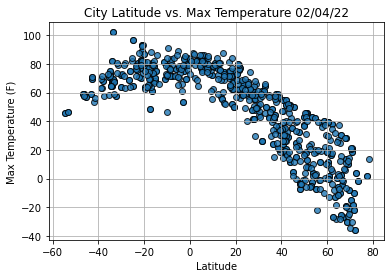

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

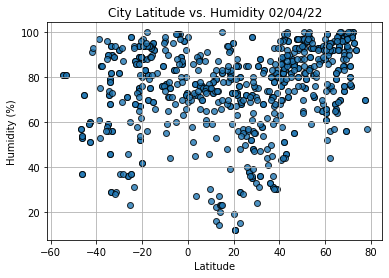

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

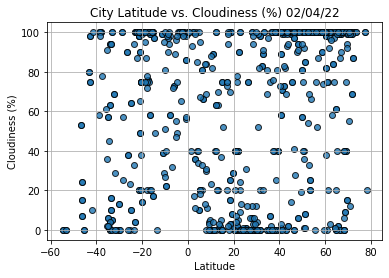

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

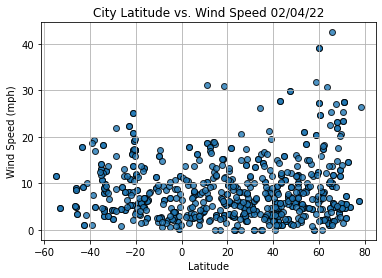

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                       Ghanzi
Country                        BW
Date          2022-02-05 03:11:47
Lat                      -21.5667
Lng                       21.7833
Max Temp                    70.03
Humidity                       75
Cloudiness                     98
Wind Speed                   5.26
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
726     True
727     True
728     True
729    False
730     True
Name: Lat, Length: 731, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhigansk,RU,2022-02-05 03:11:42,66.7697,123.3711,-27.02,98,99,4.99
1,Bajil,YE,2022-02-05 03:11:43,15.0584,43.2851,74.14,82,75,3.24
6,Butaritari,KI,2022-02-05 03:11:45,3.0707,172.7902,82.63,77,36,17.76
7,Jamestown,US,2022-02-05 03:11:45,42.0970,-79.2353,20.52,51,100,4.61
9,Sharjah,AE,2022-02-05 03:11:46,25.3573,55.4033,67.24,72,1,8.05
...,...,...,...,...,...,...,...,...,...
725,Pudozh,RU,2022-02-05 03:31:24,61.8099,36.5345,6.75,94,92,6.96
726,North Platte,US,2022-02-05 03:27:55,41.1239,-100.7654,30.09,58,0,1.01
727,Livingston,GB,2022-02-05 03:30:38,55.9029,-3.5226,39.27,82,75,14.97
728,Myanaung,MM,2022-02-05 03:31:25,18.2833,95.3167,83.98,39,70,6.17


In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhigansk,RU,2022-02-05 03:11:42,66.7697,123.3711,-27.02,98,99,4.99
1,Bajil,YE,2022-02-05 03:11:43,15.0584,43.2851,74.14,82,75,3.24
6,Butaritari,KI,2022-02-05 03:11:45,3.0707,172.7902,82.63,77,36,17.76
7,Jamestown,US,2022-02-05 03:11:45,42.0970,-79.2353,20.52,51,100,4.61
9,Sharjah,AE,2022-02-05 03:11:46,25.3573,55.4033,67.24,72,1,8.05


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

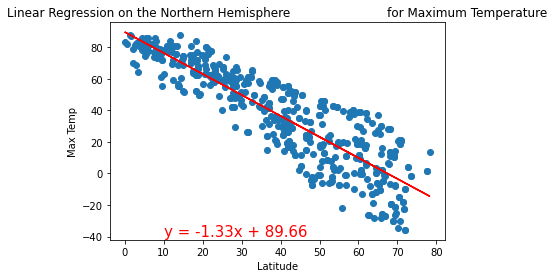

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-40))

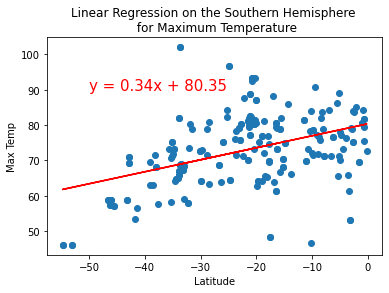

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

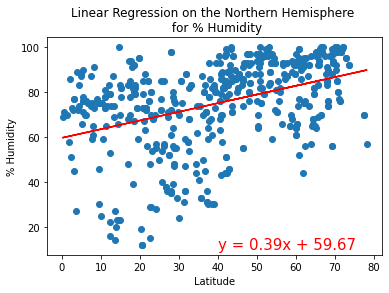

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

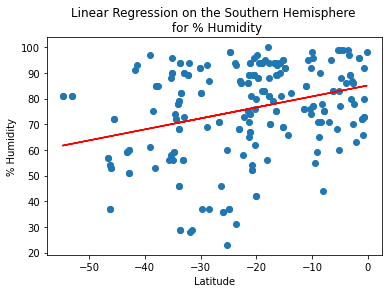

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

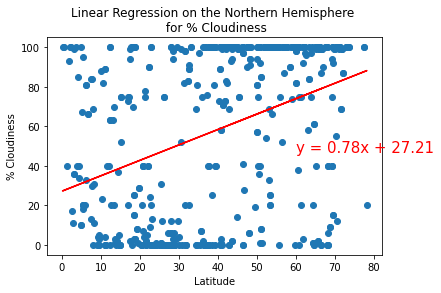

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(60,47))

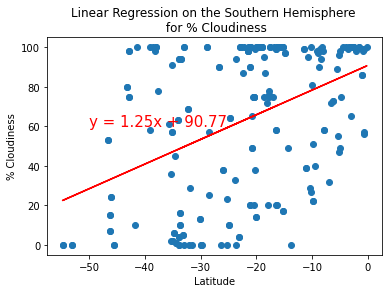

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

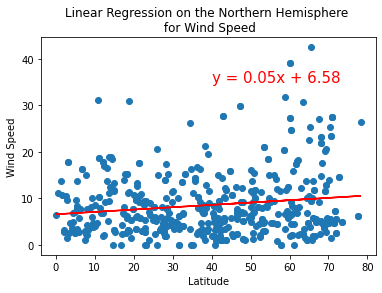

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

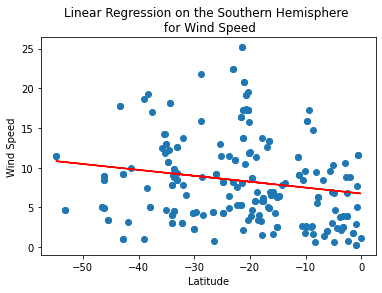

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))